# REGRESSION MODELS

Our group performed **Linear Regression** which aims to model the relationship between two or more variables by fitting a linear equation to observed data.

This is done by comparing Numerical Predictors with Response Predictors `CDR`, mainly `Age`, `MMSE`, `eTIV`, `nWBV` and `ASF`.

Our group also removed all the outliers from the data set as they could potentially skew the data and affect the accuracy of our results.

It is important to note that linear regression assumes that the response variable is continuous and follows a normal distribution, which may not hold true for categorical data `CDR` in this case. While linear regression might technically work with categorical response variables, it is not the most appropriate choice. 

As such, we also attempted **Ordinal Regression** at the end of this notebook.

# IMPORT ESSENTIAL PYTHON LIBRARIES

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# IMPORT THE DATASET

In [3]:
alzheimersData = pd.read_csv('cleaned-alzheimers-dataset.csv')
alzheimersData.head()

,Unnamed: 0,MRI ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,3,OAS1_0010_MR1,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,4,OAS1_0011_MR1,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


# LINEAR REGRESSION

# HELPER FUNCTION
Simple python functions can be written and called since the logic is repeated

In [4]:
def main(predict,response):
    X_train, X_test, y_train, y_test = train_test_split(predict, response, test_size=0.2)
    
    linreg = LinearRegression() 
    linreg.fit(X_train,y_train)

    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regresion \t: a = ',linreg.coef_)
    print()

    #Predict total values corresponding to Sale Price
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Calculate Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 2)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    train_mse = mean_sq_err(y_train, y_train_pred)
    print("Mean Squared Error (MSE) \t:", train_mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(train_mse))

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    test_mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", test_mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(test_mse))


    return

In [5]:
# Mean Squared Error (MSE) Function
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [6]:
def removeOutliers(data, predict, response):
    
    targetdata = data[[predict, response]].copy()
    
    # Calculate IQR for Predictor and Response
    Q1_predict = data[predict].quantile(0.25)
    Q3_predict = data[predict].quantile(0.75)
    IQR_predict = Q3_predict - Q1_predict
    
    Q1_response = data[response].quantile(0.25)
    Q3_response = data[response].quantile(0.75)
    IQR_response = Q3_response - Q1_response

    # Define outliers for both columns
    outliers_predict= targetdata[(targetdata[predict] < (Q1_predict - 1.5 * IQR_predict)) | (targetdata[predict] > (Q3_predict + 1.5 * IQR_predict))]
    outliers_response = targetdata[(targetdata[response] < (Q1_response - 1.5 * IQR_response)) | (targetdata[response] > (Q3_response + 1.5 * IQR_response))]

    # Union of outliers
    outliers_union = pd.concat([outliers_predict, outliers_response]).drop_duplicates()

    # Remove outliers from the dataset
    clean_data = targetdata.drop(outliers_union.index)
    
    return clean_data

In [7]:
def countOutliers(data, predict, response):
    targetdata = data[[predict, response]].copy()
    
    # Calculate IQR for Predictor and Response
    Q1_predict = data[predict].quantile(0.25)
    Q3_predict = data[predict].quantile(0.75)
    IQR_predict = Q3_predict - Q1_predict
    
    Q1_response = data[response].quantile(0.25)
    Q3_response = data[response].quantile(0.75)
    IQR_response = Q3_response - Q1_response

    # Define outliers for both columns
    outliers_predict = targetdata[(targetdata[predict] < (Q1_predict - 1.5 * IQR_predict)) | (targetdata[predict] > (Q3_predict + 1.5 * IQR_predict))]
    outliers_response = targetdata[(targetdata[response] < (Q1_response - 1.5 * IQR_response)) | (targetdata[response] > (Q3_response + 1.5 * IQR_response))]

    # Union of outliers
    outliers_union = pd.concat([outliers_predict, outliers_response]).drop_duplicates()
    
    # Calculate number of outliers removed
    num_outliers_removed = len(outliers_union)
    
    return num_outliers_removed

# Predicting `CDR` using `Age`

In [8]:
countOutliers(alzheimersData, 'Age', 'CDR')


14

In [9]:
clean_data_age = removeOutliers(alzheimersData, 'Age', 'CDR')
clean_age = pd.DataFrame(clean_data_age['Age'])
clean_cdr = pd.DataFrame(clean_data_age['CDR'])

Intercept of Regression 	: b =  [0.04306573]
Coefficients of Regresion 	: a =  [[0.00322756]]



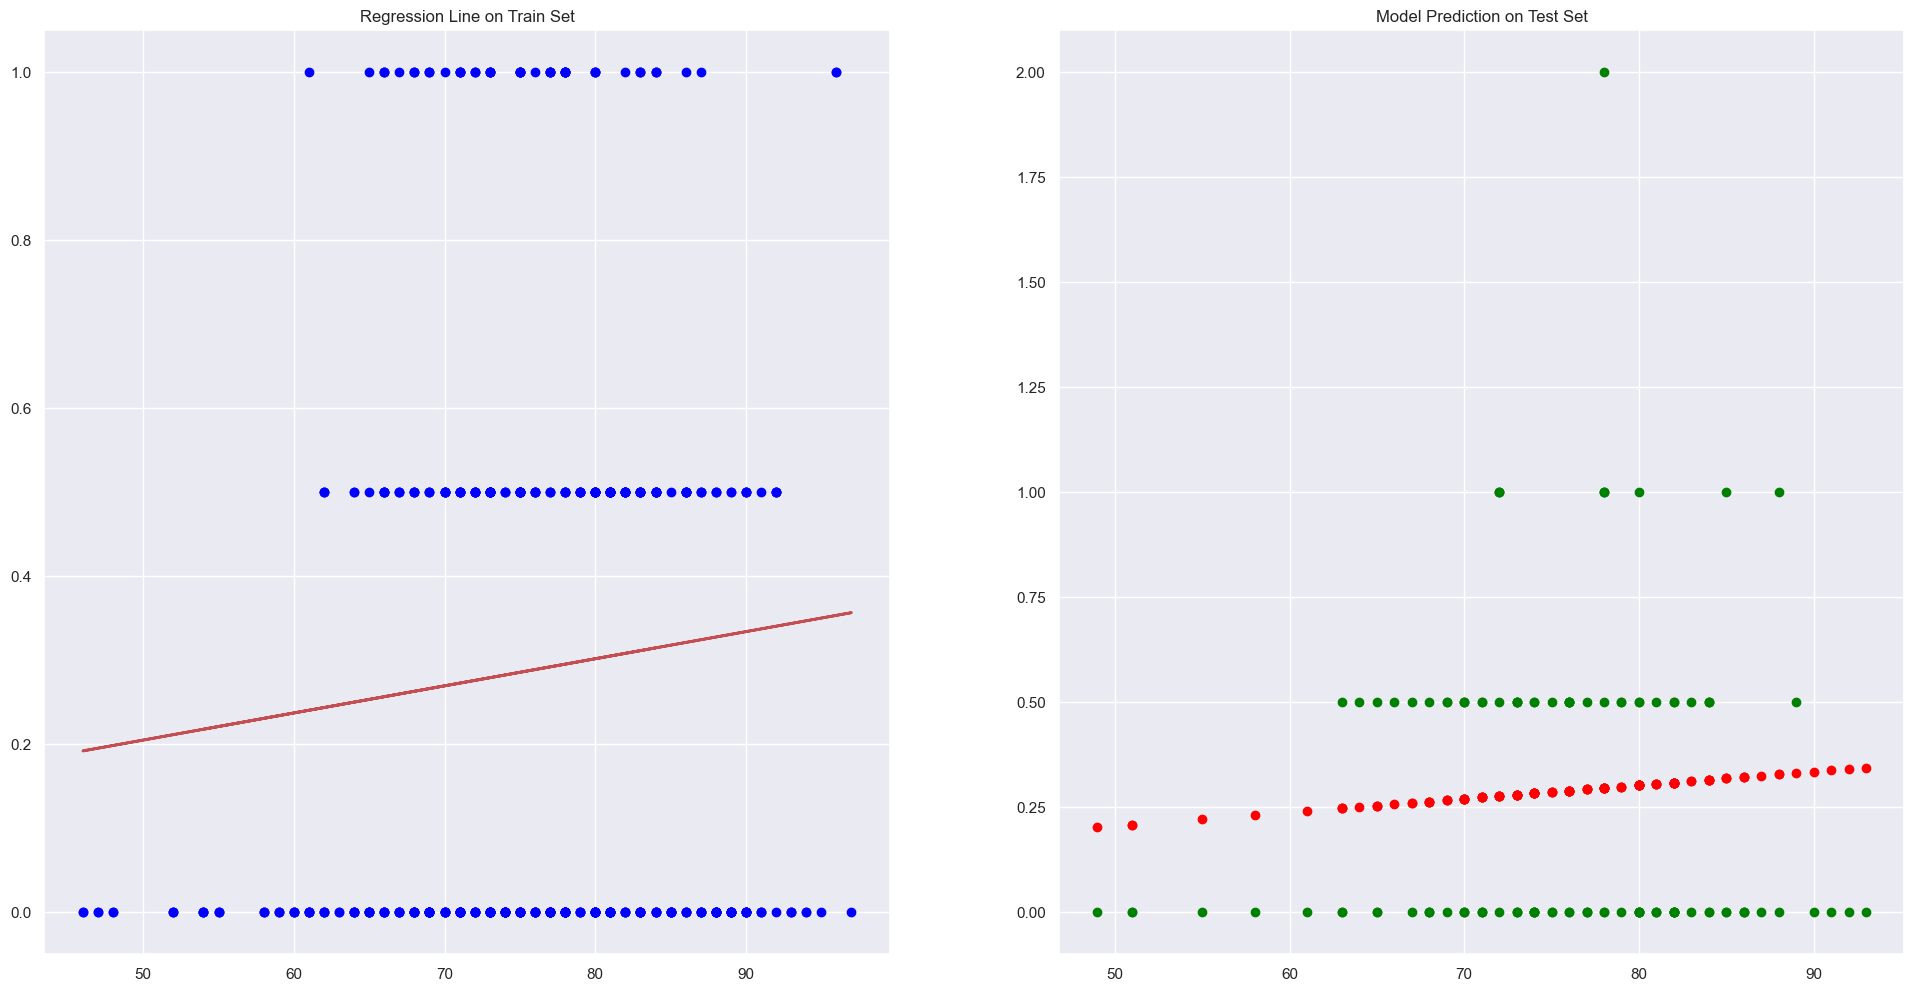

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0071882666155269614
Mean Squared Error (MSE) 	: 0.1233682710826982
Root Mean Squared Error (RMSE) 	: 0.35123819707244
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.004527005582182442
Mean Squared Error (MSE) 	: 0.12598262565595336
Root Mean Squared Error (RMSE) 	: 0.35494031280759497


In [10]:
main(clean_age, clean_cdr)

### Comments
In both data sets, the statistics values are similar. But in the test data set, the errors increased slightly, 
showing less accuracy. This could be due to the data set training with more subjects with Normal `CDR` since our data set is imbalanced with mostly Normal `CDR` subjects. 

# Predicting `CDR` using `MMSE`

Since LinearRegression does not accept missing values encoded as NaN natively, we will drop NaN values from `MMSE`


In [11]:
alzheimersData_cleaned = alzheimersData.dropna(subset=['MMSE'])
cdr = pd.DataFrame(alzheimersData_cleaned['CDR'])  # Response
mmse = pd.DataFrame(alzheimersData_cleaned['MMSE'])  # Predictor

In [12]:
countOutliers(alzheimersData, 'MMSE', 'CDR')


13

In [13]:
clean_data_MMSE = removeOutliers(alzheimersData, 'MMSE', 'CDR')
clean_data_MMSE_withoutNaN = clean_data_MMSE.dropna(subset=['MMSE'])
clean_mmse = pd.DataFrame(clean_data_MMSE_withoutNaN['MMSE'])
clean_cdr = pd.DataFrame(clean_data_MMSE_withoutNaN['CDR'])

Intercept of Regression 	: b =  [2.43517679]
Coefficients of Regresion 	: a =  [[-0.07879006]]



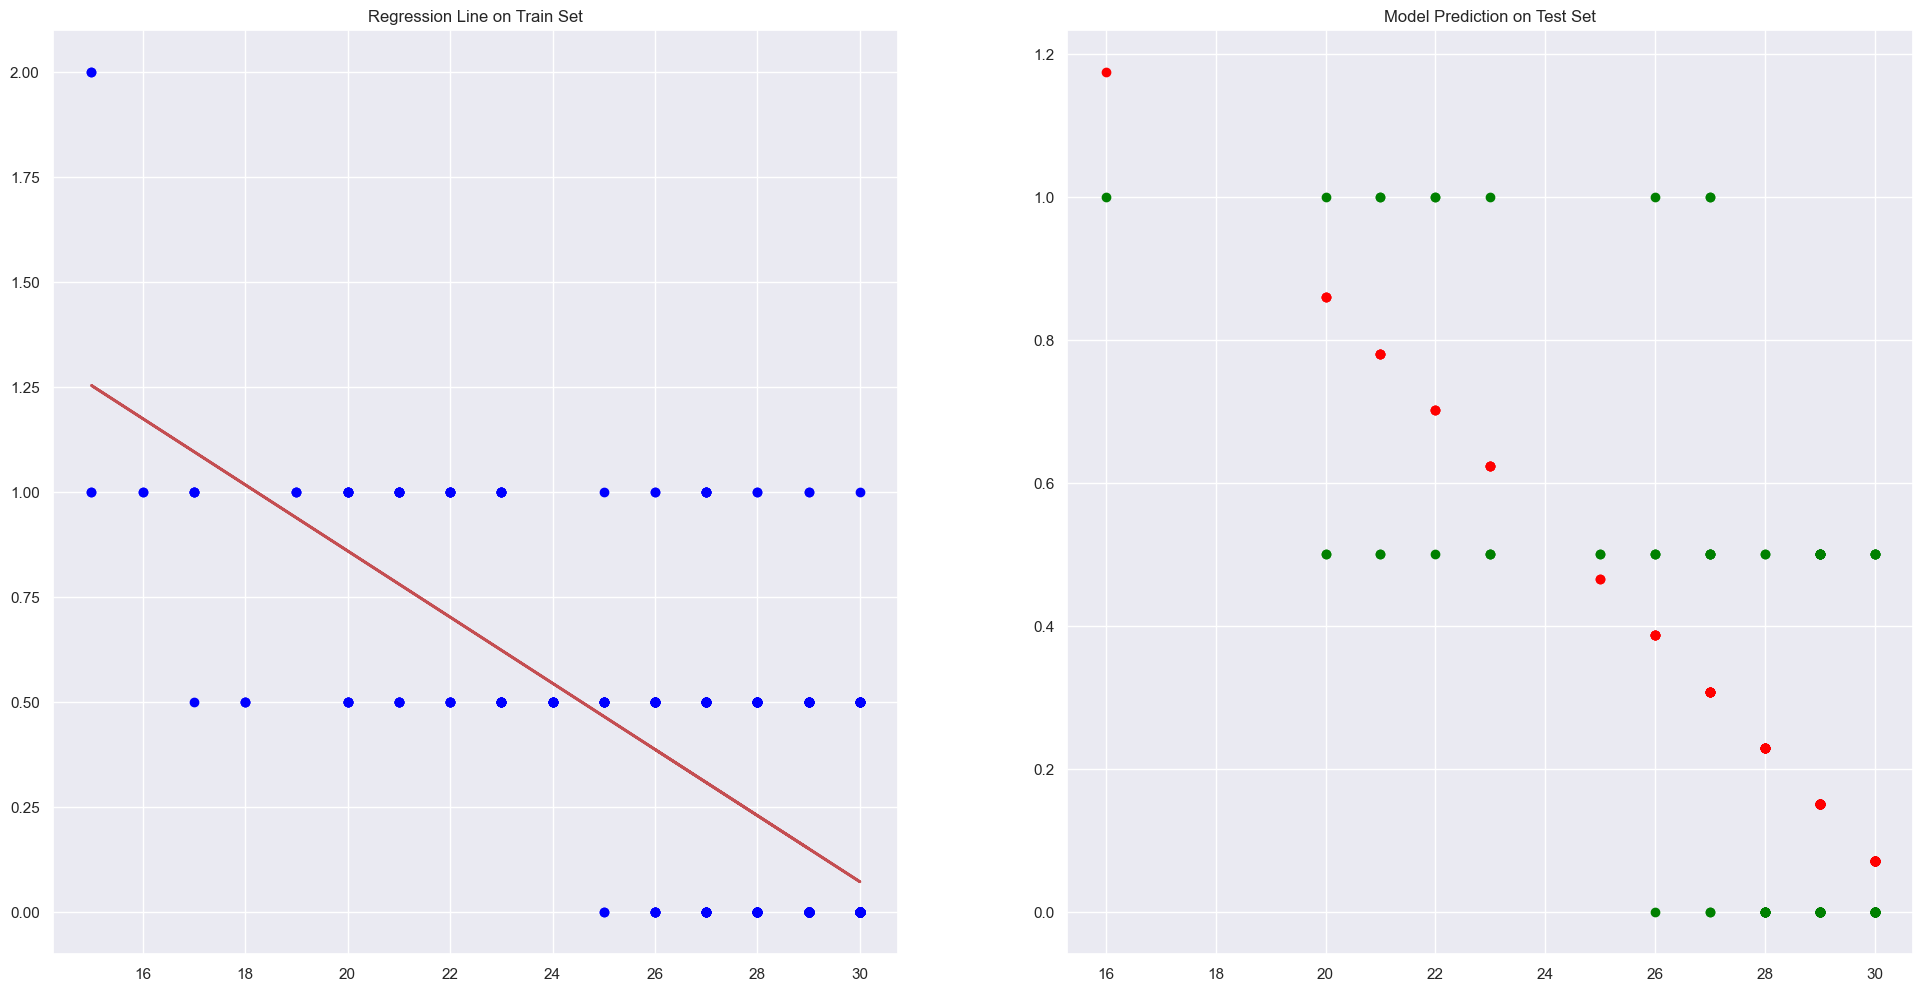

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5311228925578257
Mean Squared Error (MSE) 	: 0.059617091044782085
Root Mean Squared Error (RMSE) 	: 0.2441661136291891
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.47330993174556657
Mean Squared Error (MSE) 	: 0.05485967450570506
Root Mean Squared Error (RMSE) 	: 0.23422142196158116


In [14]:
main(clean_mmse, clean_cdr)

### Comments
The model is accurate as there errors decreased in the train dataset. This is likely due to the close theoretical relationship between cognitive impairment and dementia.

# Predicting `CDR` using `eTIV`

In [15]:
countOutliers(alzheimersData, 'eTIV', 'CDR')

13

In [16]:
clean_data_etiv = removeOutliers(alzheimersData, 'eTIV', 'CDR')

In [17]:
clean_etiv = pd.DataFrame(clean_data_etiv['eTIV'])
clean_cdr = pd.DataFrame(clean_data_etiv['CDR'])


Intercept of Regression 	: b =  [0.17545312]
Coefficients of Regresion 	: a =  [[6.87606056e-05]]



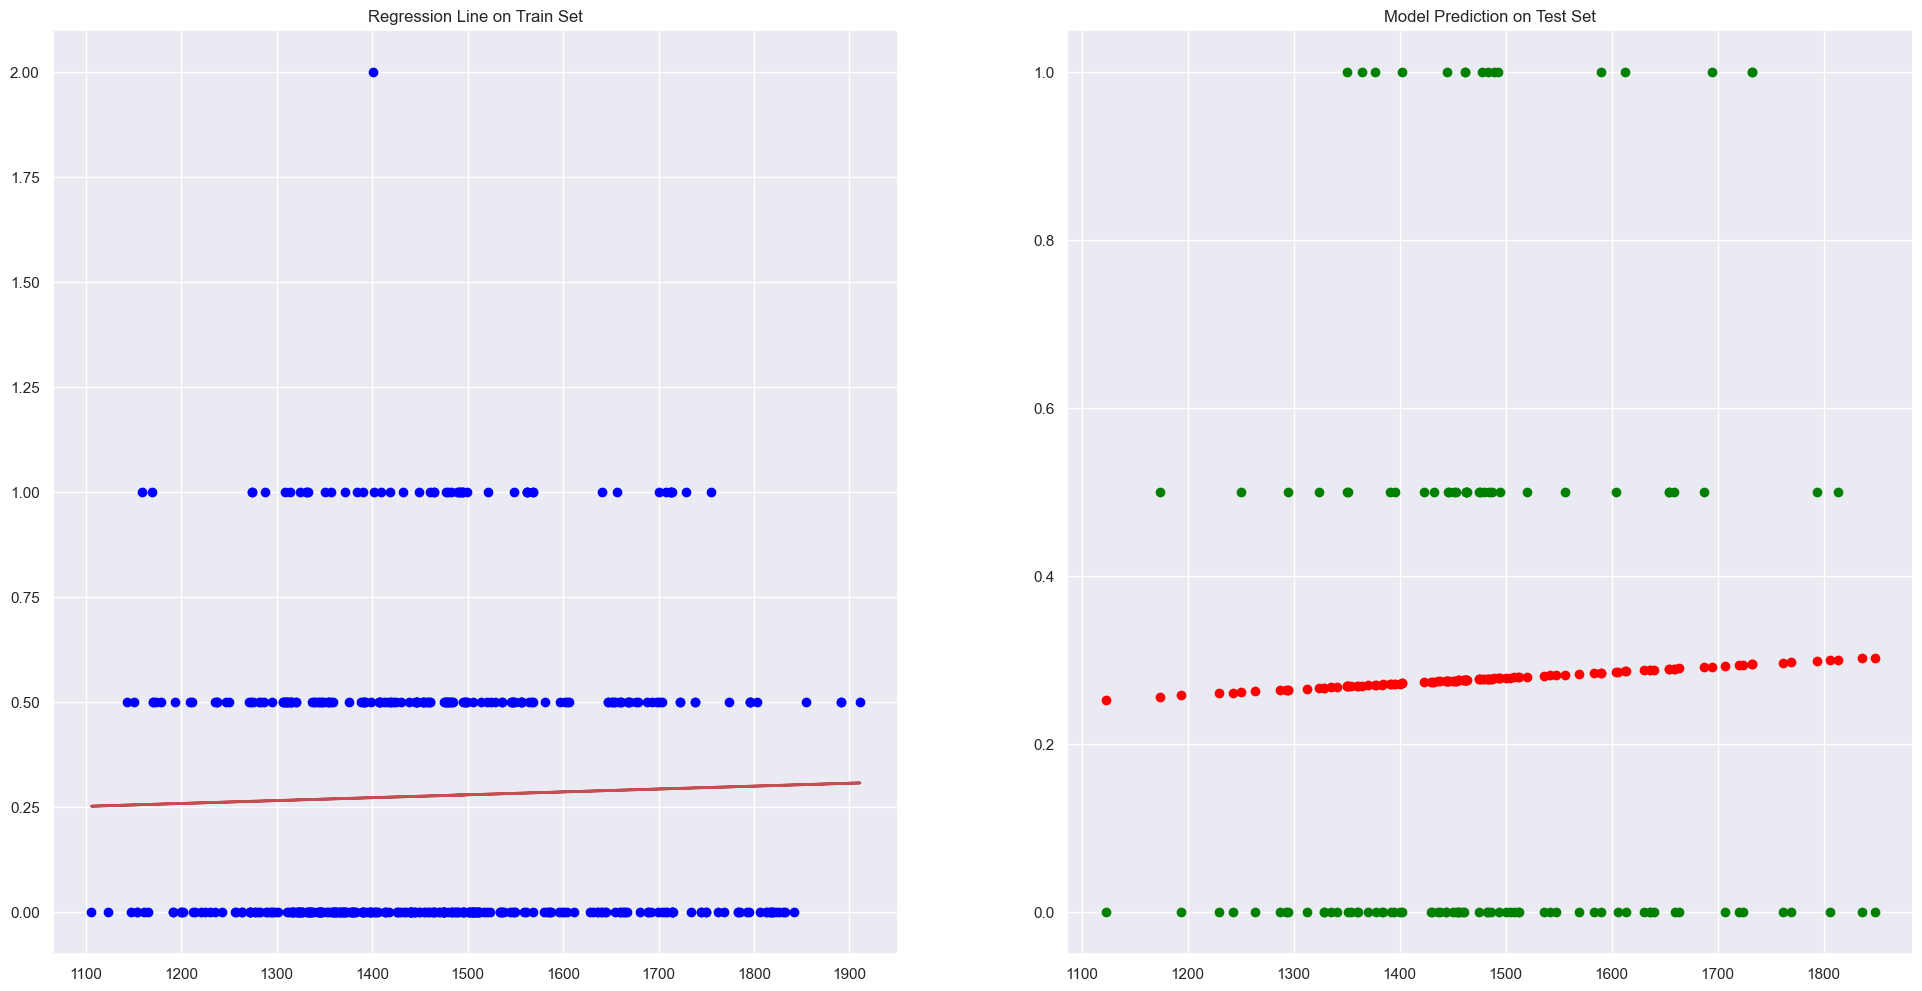

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0010501064553826156
Mean Squared Error (MSE) 	: 0.12260587110774696
Root Mean Squared Error (RMSE) 	: 0.35015121177535136
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0025423180507960774
Mean Squared Error (MSE) 	: 0.12886440428826135
Root Mean Squared Error (RMSE) 	: 0.3589768854512242


In [18]:
main(clean_etiv, clean_cdr)

### Comments
The model is less accurate as the errors increased slightly. This could be due to the data set training with a wider distribution of `eTIV` values as mentioned. 

# Predicting `CDR` using `nWBV`

In [19]:
countOutliers(alzheimersData, 'nWBV', 'CDR')

5

In [20]:
clean_data_nwbv = removeOutliers(alzheimersData, 'nWBV', 'CDR')

In [21]:
clean_nwbv = pd.DataFrame(clean_data_nwbv['nWBV'])
clean_cdr = pd.DataFrame(clean_data_nwbv['CDR'])

Intercept of Regression 	: b =  [2.63641888]
Coefficients of Regresion 	: a =  [[-3.2130529]]



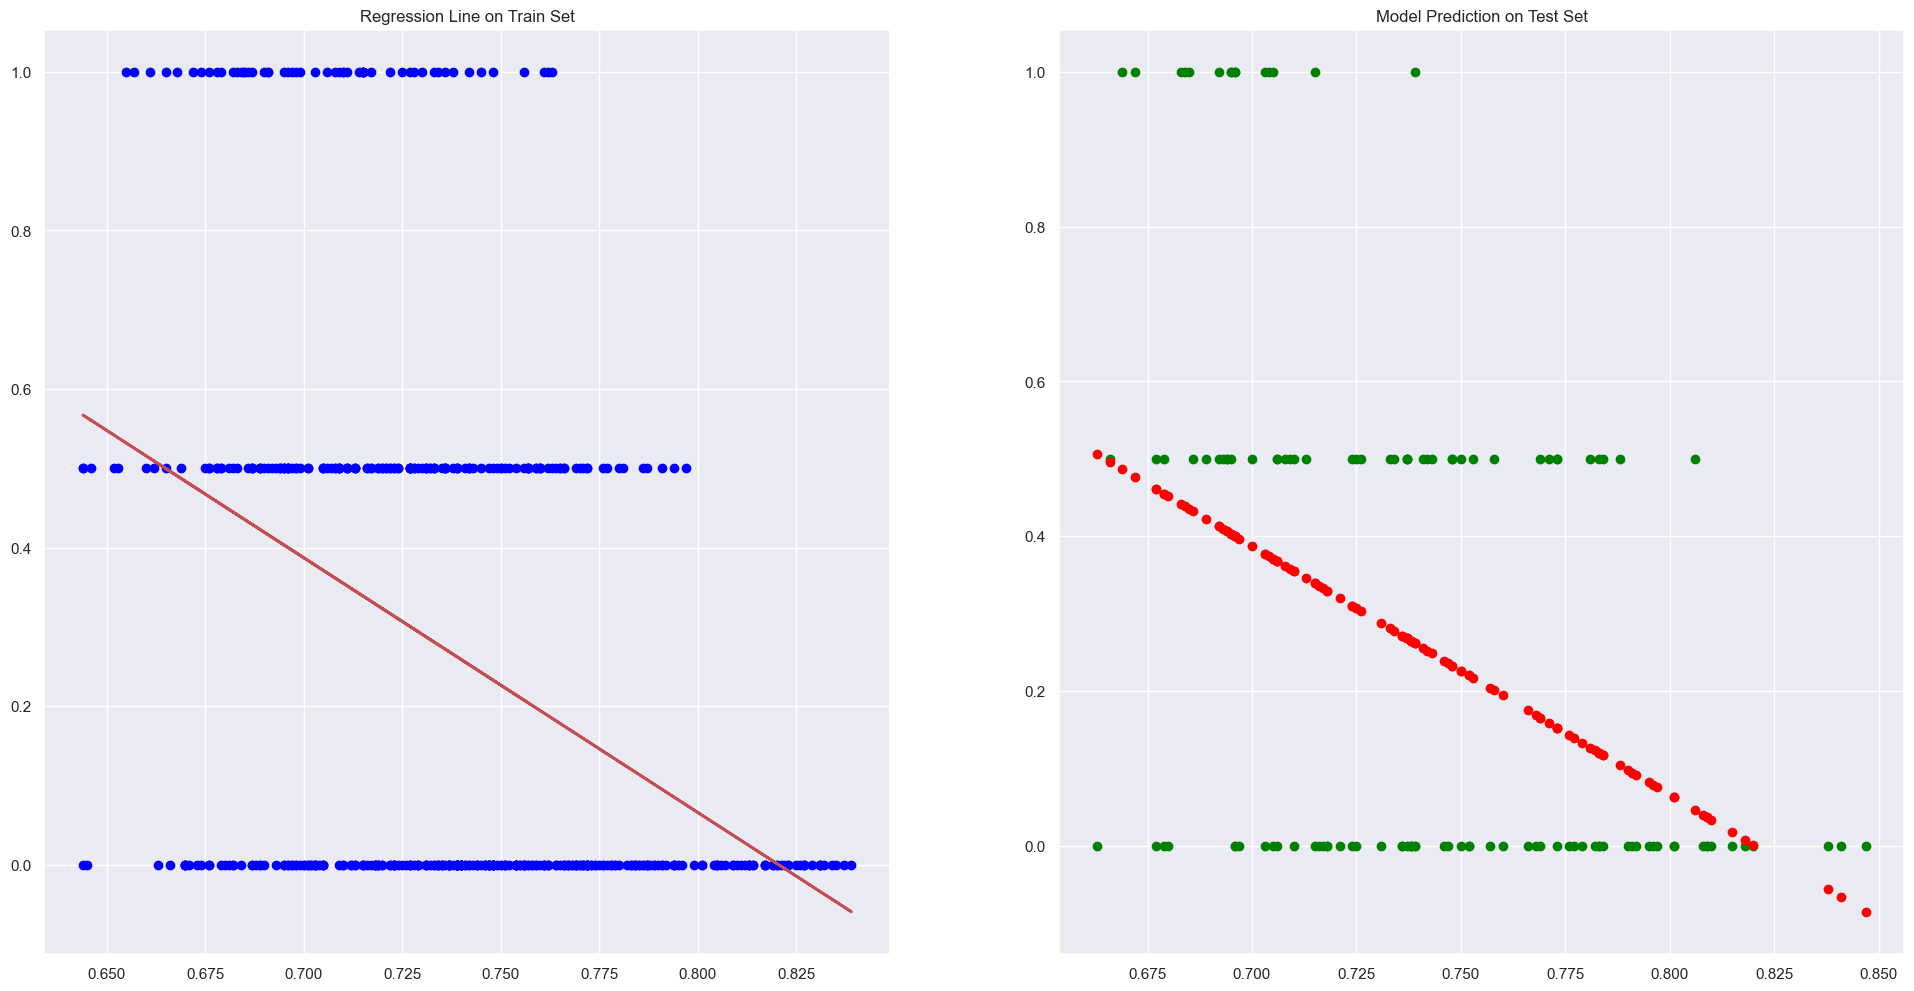

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.15611920733603513
Mean Squared Error (MSE) 	: 0.09971966035020917
Root Mean Squared Error (RMSE) 	: 0.3157841990192181
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.19925981591951003
Mean Squared Error (MSE) 	: 0.09787067546014867
Root Mean Squared Error (RMSE) 	: 0.31284289261568443


In [22]:
main(clean_nwbv, clean_cdr)

### Comments
Similarly to `eTIV`, the model is accurate as the errors have decreased in the test dataset. However, the increase in explained variance could be due to the wider distribution of `nWBV` among the subjects.

# Predicting `CDR` using `ASF`

In [23]:
countOutliers(alzheimersData, 'ASF', 'CDR')

5

In [24]:
clean_data_asf = removeOutliers(alzheimersData, 'ASF', 'CDR')

In [25]:
clean_asf = pd.DataFrame(clean_data_asf['ASF'])
clean_cdr = pd.DataFrame(clean_data_asf['CDR'])

Intercept of Regression 	: b =  [0.46228236]
Coefficients of Regresion 	: a =  [[-0.15927089]]



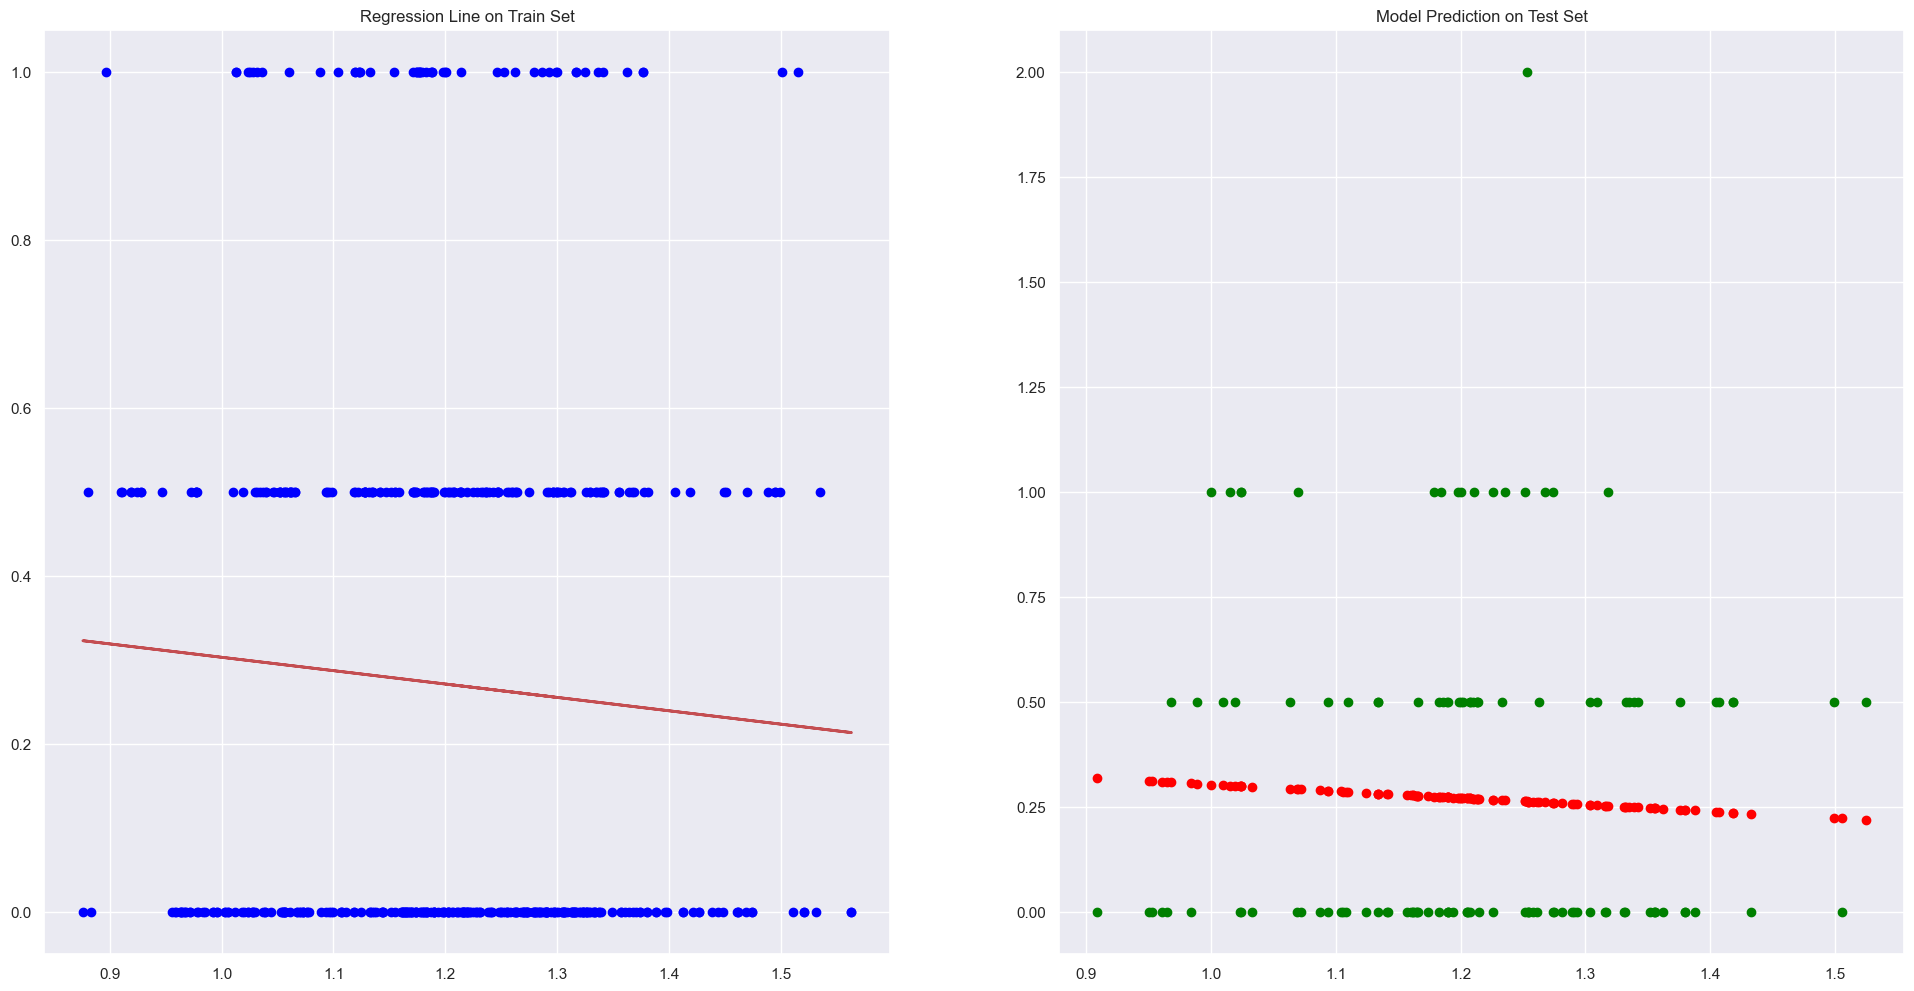

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.004006698210220594
Mean Squared Error (MSE) 	: 0.11657984045511835
Root Mean Squared Error (RMSE) 	: 0.3414379013160641
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.010496328225978901
Mean Squared Error (MSE) 	: 0.15187467866001414
Root Mean Squared Error (RMSE) 	: 0.3897110194233852


In [26]:
main(clean_asf, clean_cdr)

### Comments
The model is not as accurate in predicting `CDR` since the errors have increased. However, as mentioned `ASF` values serve as a quality assurance metric in neuroimaging studies and may not have an explicit relationship with `CDR`.

# Overall Evaluation

## Pair-Plot

We will first drop the columns which is not essential to our analysis here, mainly MRI ID, M/F, Educ, SES

In [27]:
alzheimersData_dropped = alzheimersData.drop(alzheimersData.columns[0], axis=1).drop(columns=['MRI ID','M/F', 'Educ', 'SES'])

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


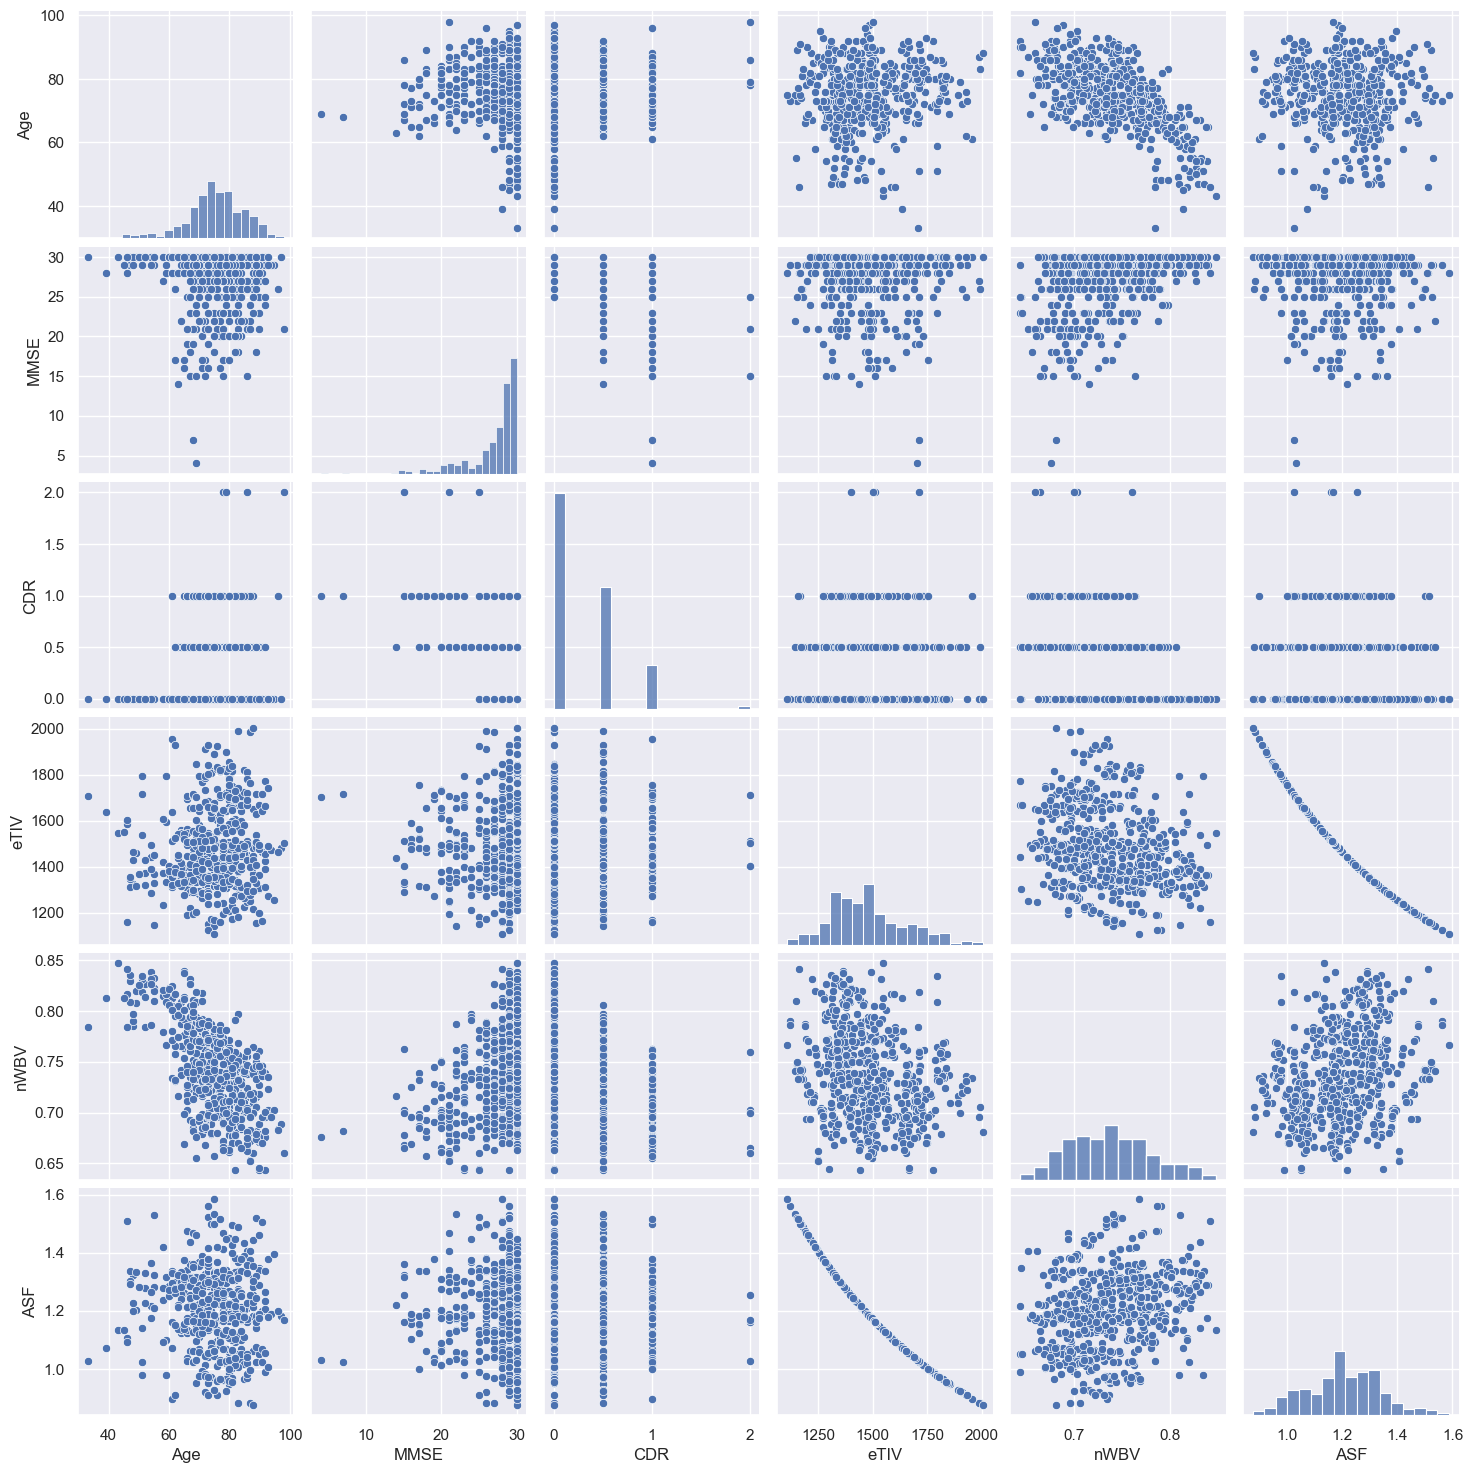

In [28]:

sb.pairplot(alzheimersData_dropped)

plt.show()

## Mutual Correlation

We will first drop the columns which is not essential to our analysis here, mainly `MRI ID`, `M/F`, `Educ`, `SES`

In [29]:
alzheimersData = pd.read_csv('cleaned-alzheimers-dataset.csv')

alzheimersData_dropped = alzheimersData.drop(alzheimersData.columns[0], axis=1).drop(columns=[ 'MRI ID', 'M/F', 'Educ', 'SES'])

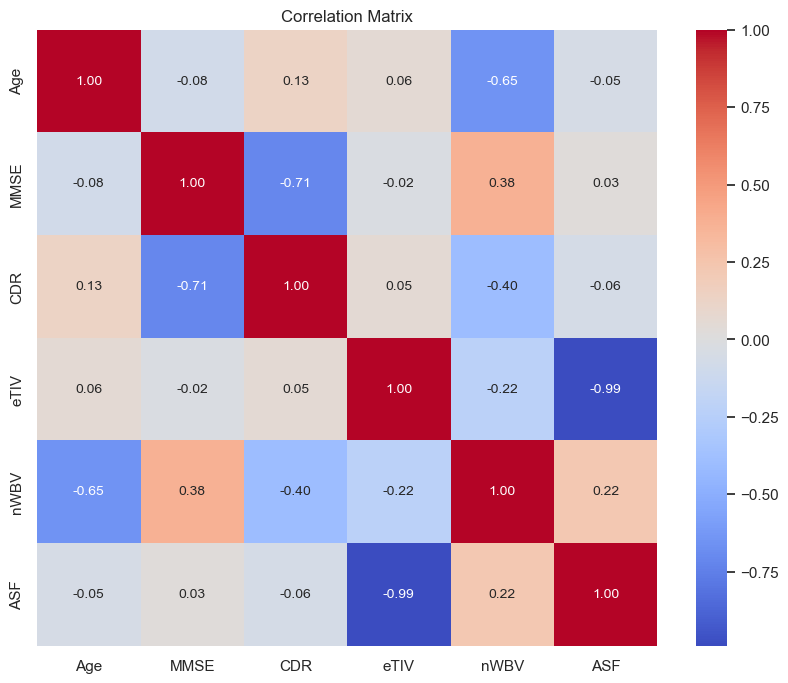

In [30]:
correlation_matrix = alzheimersData_dropped.corr()

# Visualise the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

It is clear that `MMSE` has the highest correlation (-0.71) with `CDR` while `eTIV`(0.05) and `ASF`(-0.06) has the lowest correlation with CDR. This is aligned with our EDA where Very Mild, Mild and Moderate alzheimers ratings were found scattered across various `eTIV` and `ASF` values.


# ORDINAL LOGISTICS REGRESSION MODEL

Ordinal logistic regression is a type of regression analysis used when the dependent variable (response variable) is ordinal, meaning it has ordered categories but the intervals between the categories may not be equal.

The response variable `CDR` (Clinical Dementia Rating) has ordered categories such as 0 (Non-Demented), 0.5 (Very Mild Dementia), 1 (Mild Dementia), and 2 (Moderate dementia).

It models the cumulative odds of being in a category equal to or below a certain level versus being in a higher category by estimating the relationship between the predictors (independent variables) and the cumulative odds of the ordinal response variable. Hence, the main goal is to understand how the predictor variables influence the likelihood of an observation falling into each category of the ordinal response variable.

## Import Essential Python Libraries

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Helper Function

In [32]:
def ordinal_regression_visualisation1(df, predictor, response):
    # Fit ordinal logistic regression model
    formula = f"{response} ~ {predictor}"
    model = smf.mnlogit(formula, df)
    result = model.fit()

    # Generate predicted probabilities for each category of the response variable
    pred_prob = result.predict(df[predictor]).values
    categories = sorted(df[response].unique())

    # Define color palette for classes of CDR
    num_categories = len(categories)
    palette = sb.color_palette('husl', num_categories)

    # Plot predicted probabilities
    plt.figure(figsize=(10, 6))
    for i, category in enumerate(categories):
        plt.scatter(df[predictor], (df[response] == category).astype(int), label=f'{response} = {category}', color=palette[i], alpha=0.5)

    for i, category in enumerate(categories):
        plt.plot(df[predictor], pred_prob[:, i], color=palette[i], label=f'Predicted probabilities for {response} = {category}')

    plt.xlabel(predictor)
    plt.ylabel('Probability')
    plt.title('Predicted Probabilities of {} Categories'.format(response))
    plt.legend()
    plt.grid(True)
    plt.show()

## Predicting `CDR` using `Age`

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5430: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


Optimization terminated successfully.
         Current function value: 0.946102
         Iterations 10


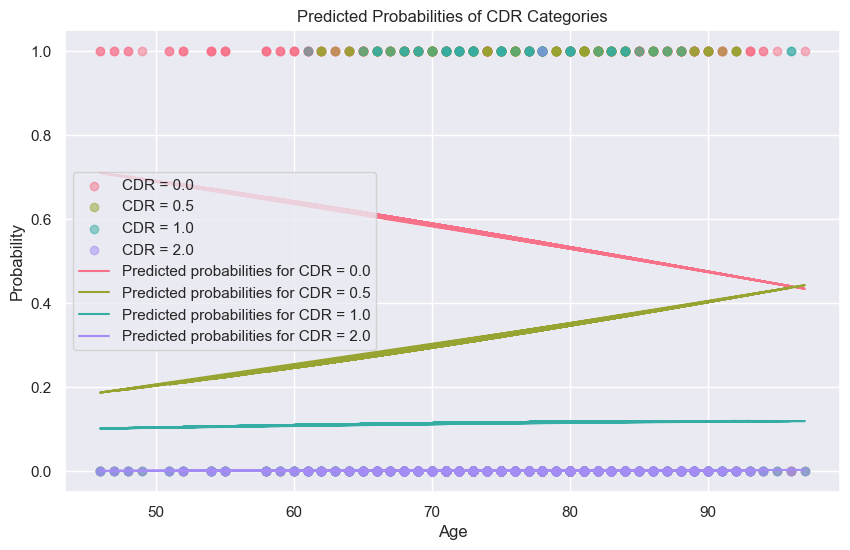

In [33]:
ordinal_regression_visualisation1(clean_data_age, 'Age', 'CDR')

### Comments
A high function value suggests a higher predicted probability of the corresponding outcome given the values of a predictor variable. Thus, with a high value of 0.946 close to 1, the model in predciting the relationship between age and CDR is highly accurate. Furthermore, as age increases, the predicted probability of non-dementia (CDR = 0) decreases, supporting our knowledge of dementia prevalence among elderly. 

## Predicting `CDR` using `MMSE`

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5430: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)
/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.605671
         Iterations: 35


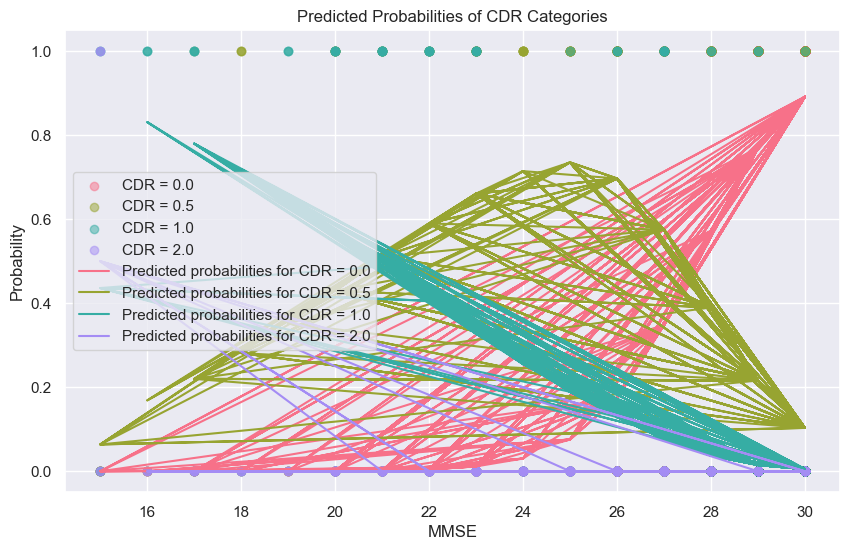

In [34]:
ordinal_regression_visualisation1(clean_data_MMSE_withoutNaN, 'MMSE', 'CDR')


It appears that the the *Maximum Likelihood* optimization failed to converge. Let us try using a different optimization algorithm provided by statsmodels. We also tried to add regularization to the model, which add a penalty term to the optimization objective function, penalising large coefficient values and helping to prevent overfitting.

In [35]:
def ordinal_regression_visualisation2(df, predictor, response):
    # Fit ordinal logistic regression model with regularization
    formula = f"{response} ~ {predictor}"
    model = smf.mnlogit(formula, df)
    
    # Specify regularization method (e.g., 'l1' for Lasso regularization)
    result = model.fit_regularized(method='l1', alpha=0.1)  # Adjust alpha for regularization strength
    
    # Generate predicted probabilities for each category of the response variable
    pred_prob = result.predict(df[predictor]).values
    categories = sorted(df[response].unique())

    # Define color palette for classes of CDR
    num_categories = len(categories)
    palette = sb.color_palette('husl', num_categories)

    # Plot predicted probabilities
    plt.figure(figsize=(10, 6))
    for i, category in enumerate(categories):
        plt.scatter(df[predictor], (df[response] == category).astype(int), label=f'{response} = {category}', color=palette[i], alpha=0.5)

    for i, category in enumerate(categories):
        plt.plot(df[predictor], pred_prob[:, i], color=palette[i], label=f'Predicted probabilities for {response} = {category}')

    plt.xlabel(predictor)
    plt.ylabel('Probability')
    plt.title('Predicted Probabilities of {} Categories'.format(response))
    plt.legend()
    plt.grid(True)
    plt.show()


/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5430: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)
/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 6 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6248351751608118
            Iterations: 124
            Function evaluations: 136
            Gradient evaluations: 124


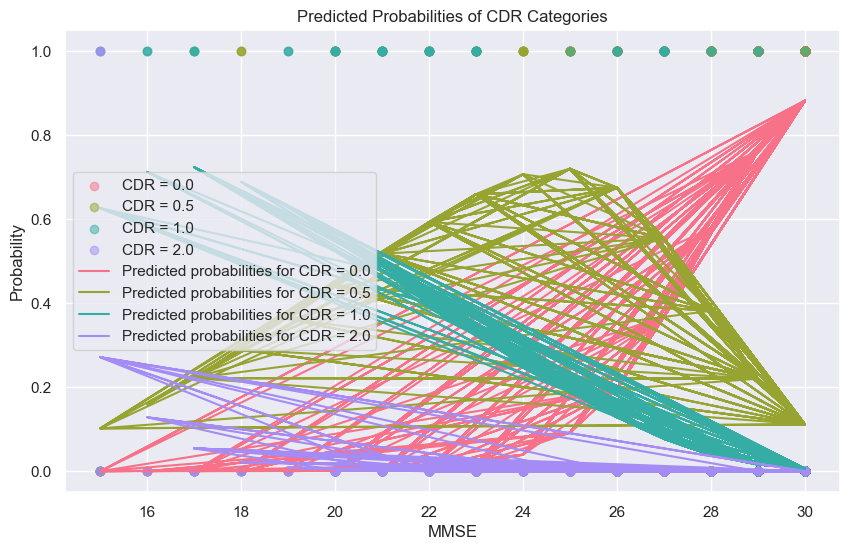

In [36]:
ordinal_regression_visualisation2(clean_data_MMSE_withoutNaN, 'MMSE', 'CDR')

The crisscrossing lines and intersections between the predicted probability curves for different `CDR` values indicate a violation of the parallel lines assumption, which is a key requirement for ordinal logistic regression models.

In an ordinal logistic regression model, the assumption is that the coefficients that describe the relationship between the predictor variables and the logit (log odds) of the response categories are the same across all categories.

However, in this plot, we can see that the predicted probability lines for different `CDR` values intersect and cross each other, suggesting that the effects of the predictor variables on the odds may not be consistent across all categories.

## Predicting `CDR` using `eTIV`

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5430: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


Optimization terminated successfully.
         Current function value: 0.942870
         Iterations 10


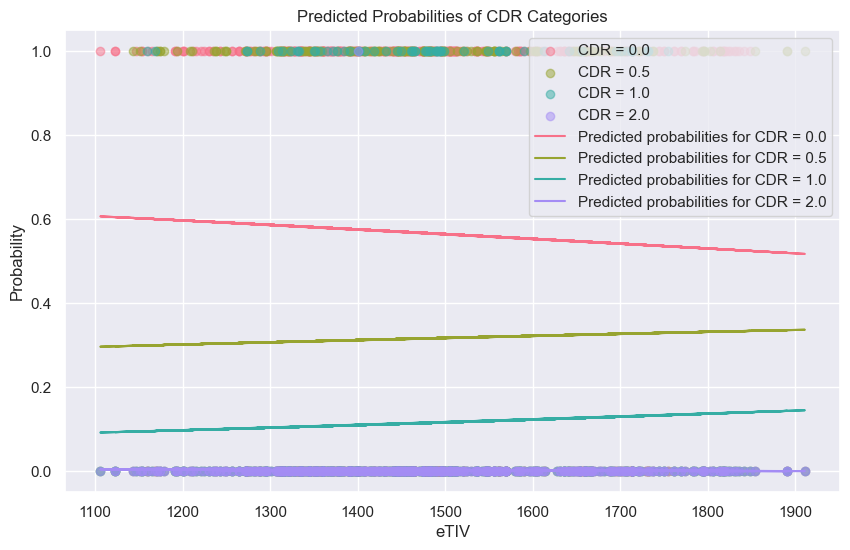

In [37]:
ordinal_regression_visualisation1(clean_data_etiv, 'eTIV', 'CDR')

### Comments
Similarly to the age model, the function value for predicting CDR using eTIV is also very high indicating a highly accurate model. 

As eTIV increases, the predicted probabilites for CDR = 0.0 decreases while the predicted probabilities for CDR = 0.5 and 1.0 increased slightly. 
This contradicts our previous understanding that eTIV is lower in demented patients and revealed that high eTIV is actually indicative of dementia instead. This is because as intracranial volume increases, it may indicate a larger brain size, which could potentially accommodate more neuropathological changes associated with dementia, leading to higher predicted probabilities for mild dementia.

## Predicting `CDR` using `nWBV`

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5430: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


Optimization terminated successfully.
         Current function value: 0.840757
         Iterations 7


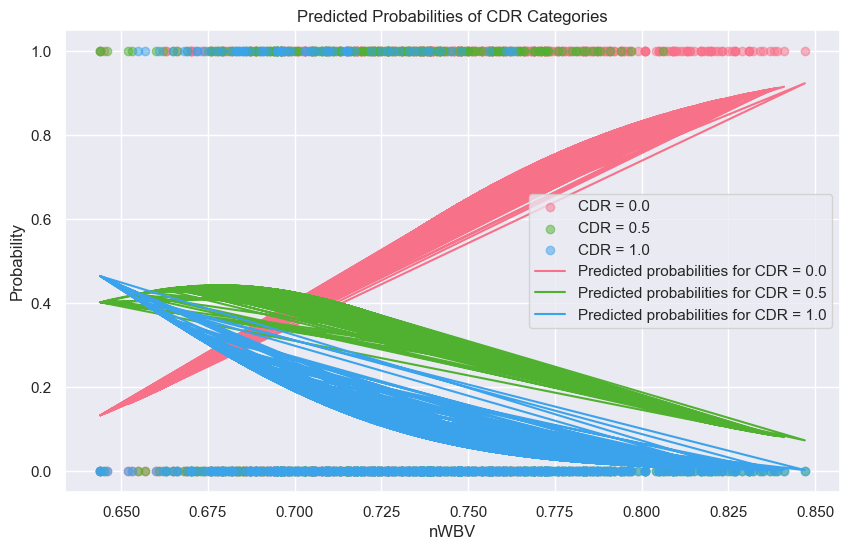

In [38]:
ordinal_regression_visualisation1(clean_data_nwbv, 'nWBV', 'CDR')

### Comments 
Unlike the other models, the lines representing predicted probablities for the respective CDRs intersect with one another. The intersections might reflect the complex nature of brain function and its relationship to dementia. Different regions of the brain or different cognitive functions associated with specific brain volumes may contribute to varying degrees to the overall dementia rating, resulting in intersections as these factors interact. This aligns with the understanding that dementia is usally affected by many factors.

Besides the intersections, the model also has a high function value of 0.84 which means that there is high accuracy. 

## Predicting `CDR` using `ASF`

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:5430: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


Optimization terminated successfully.
         Current function value: 0.944744
         Iterations 10


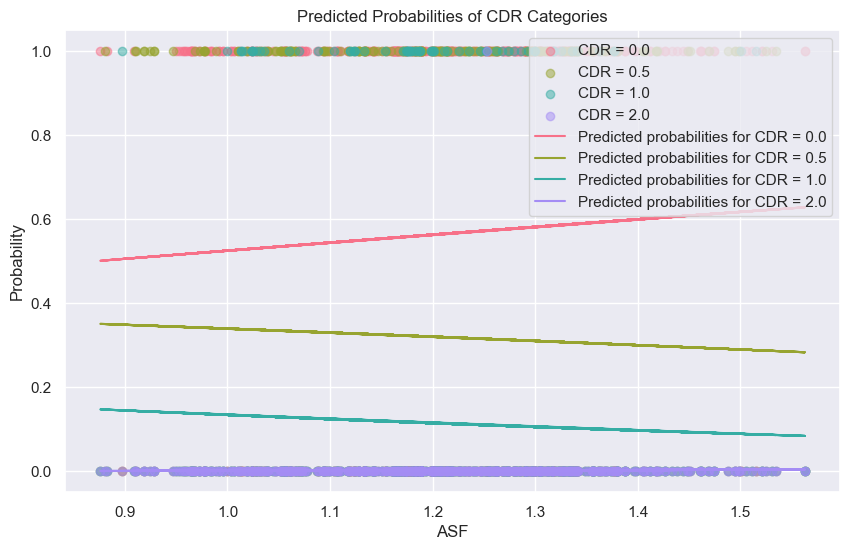

In [39]:
ordinal_regression_visualisation1(clean_data_asf, 'ASF', 'CDR')

### Comments
The high function value 0.945 suggests that the model using the atlas scaling factor as a predictor is effective at distinguishing between different dementia rating categories based on brain structure. 

This could indicate that the atlas scaling factor captures important variations in brain morphology related to dementia progression.